# Описание проекта

##### Цель 
Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

# Описания данных

* Name — название игры
* 		Platform — платформа
* 		Year_of_Release — год выпуска
* 		Genre — жанр игры
* 		NA_sales — продажи в Северной Америке (миллионы проданных копий)
* 		EU_sales — продажи в Европе (миллионы проданных копий)
* 		JP_sales — продажи в Японии (миллионы проданных копий)
* 		Other_sales — продажи в других странах (миллионы проданных копий)
* 		Critic_Score — оценка критиков (максимум 100)
* 		User_Score — оценка пользователей (максимум 10)
* 		Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as nmp
from scipy import stats as st
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [2]:
data

In [3]:
data.head(5)

In [4]:
data.tail(5)

In [5]:
data.info()

In [6]:
#посмотрим столбец с названием игры на дубликаты
len(data['Name'].duplicated())

#### Дубликаты отсутствуют

#### Микро вывод
* В данных нужно будет поменять типы,
* привести названия столбцов к нижниму регистру 
* заполнить пропуски

* Заменим названия столбцов (приведем к нижнему регистру)

In [7]:
data.columns = data.columns.str.lower()

In [8]:
data

* Преобразуем данные в нужные типы + описать, в каких столбцах заменили тип данных и почему

In [9]:
#посмотрим типы данных
data.info()

Считаю, что необходимо заменить тип данных в year_of_release, так как год может быть только int,но так как там есть Nan - это не получится сделать.В дальнейшем можно посмотреть много ли таких пропусков в данных, и если их не много то либо удалить,либо оставить.Думаю что заменять на 0 не стоит, так как это может негативно повлиять на ход исследования.

* Обработаем пропуски при необходимости

In [10]:
#посмотрим на общее кол-во пропусков в каждом столбце и исходя из этого примем решения что с ними делат 

In [11]:
#всего пропусков 
data.isna().sum()

In [12]:
#пропуски в процентах
pd.DataFrame(round(data.isna().mean() * 100,)).style.background_gradient('coolwarm')

In [13]:
data= data.dropna(subset=['year_of_release'])
data['year_of_release']=data['year_of_release'].astype('int')

In [14]:
data.isna().sum()

In [15]:
#после удаления пропусков в столбце year_of_release, образовались пропуски в стообцах name и genre, из мы тоже удалим.
data= data.dropna(subset=['name'])
data= data.dropna(subset=['genre'])

In [16]:
data.isna().sum()

In [17]:
#заменим все пропуски в столбце 'user_score' на значения 0, так как определить их мы не сможем
data['user_score'] = data['user_score'].fillna(nmp.nan) 
data['user_score'] = data['user_score'].replace('tbd',nmp.nan) 
data['user_score'] = data['user_score'].astype('float64')

In [18]:
data['rating'].unique()

In [19]:
#заменили nan на ND что означает not defined(не определено)
data['rating']=data['rating'].fillna('ND')

In [20]:
data.isna().sum()

#### Вывод

Считаю что не стоит заменять пропущенные данные на среднее или медиану,так как это может повлиять на ход дальнейшего исследования.Эти данные формируются при помощи  пользователей и критиков и каждая оценка сугубо индивидуальная.
#### Причины пропусков могут быть такие :
* игра выпущена давно и на тот момент данные игры не нуждались в оценках;
* игра выпущена давно и оценка формировалась по-другому;
* оценка формируется(если игра "свежая")
* оценка формировалась,но по какойто причине не стала известна

Погуглив я узнал, что аббревиатура 'tbd' означает - будет определено.То есть оценка еще формируется.На формирование оценки мы никак не можем повлиять, а вычеслить какое-то среднее или медианное занчение может быть ошибкой.Удалить данные строки считаю не целесообразным решением, так как от данных останется примерно 50-60 процентов от исходных, это не очень хорошо, так как фрейм будет скудным.


* посчитаем суммарные продажи по каждой игре со всех регионов продаж

In [21]:
data['all_sales']=data[['na_sales','jp_sales','eu_sales','other_sales']].sum(axis=1)

In [22]:
data

## Шаг 3. Провести исследовательский анализ данных

* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

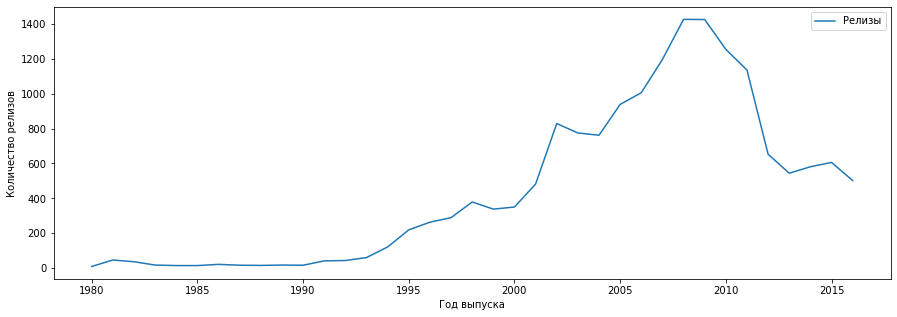

In [23]:
plt.figure(figsize=(15,5))
plt.plot(data.groupby('year_of_release')['name'].count(), label='Релизы')
plt.legend()
plt.xlabel('Год выпуска')
plt.ylabel('Количество релизов')
plt.show()

In [24]:
data.groupby('year_of_release')['name'].count().sort_values(ascending=False)

#### Подытог

За все временные периоды данные не очень важны, так как в начале, игр выпускалось крайне мало,то есть с каждым годом выпускаемых игр становилось все больше и больше.Хорошо видно,что скачок выпускаемых игр произошел в 1994 году.По сравнению с прошлым кол-во выпускаемых игр выросло в 2 раза(с 60 до 121).Самый пик произошел в 2008 году.

* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [25]:
top = data.groupby('platform')['all_sales'].sum().sort_values(ascending=False)
top

Больше всего игр было выпущено на платформе PS2, меньше всего на PCFX.

In [26]:
abc = data.pivot_table(index='platform',columns='year_of_release',values='all_sales',aggfunc=('sum'))


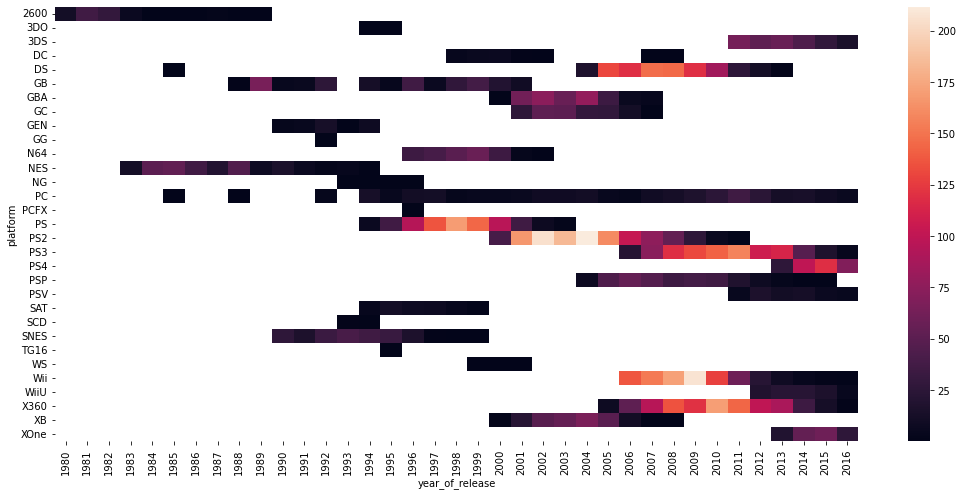

In [27]:
plt.figure(figsize=(18, 8))
sb.heatmap(abc);

Хорошо видно,как на графике выше - сменяются старые консоли на новые,хорошо видно это на примере PS,PS2,PS3,PS4.Как только кол-во проджа становится меньше,выпускается новая консоль.В среднем одна консоль служит примерно 10 лет.

In [28]:
mm = data.query('year_of_release >= 2015')
abc = mm.pivot_table(index='platform',columns='year_of_release',values='all_sales',aggfunc=('sum'))


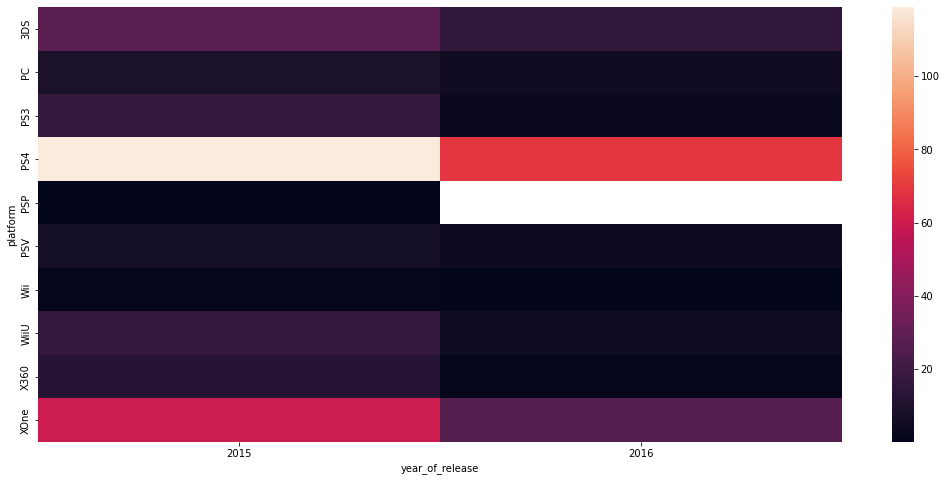

In [29]:
plt.figure(figsize=(18, 8))
sb.heatmap(abc);

На графике видно, что чем ближе продажи к 2016 году, тем их становится меньше и меньше.Рынок видеоигр,в целом,идет на спад.Но PS4 единственный кто так сильно не уходит в "тьму", и это из-за того что компания вровремя выпустили данную консоль, чуть хуже обстоят дела у XOne.У консоли PSP вообще нет продаж,видимо прекратили ссуществование.

* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Актуальным периодом можно считать все данные с 2015 года, так как индустрия очень активно развивается.Исходя из этого можно сделать более уровновешенный прогонз на 2017.

In [30]:
#сохраним в отдельной переменной платформs по проджам за период с 2015 года
year = data.query('year_of_release >= 2015')

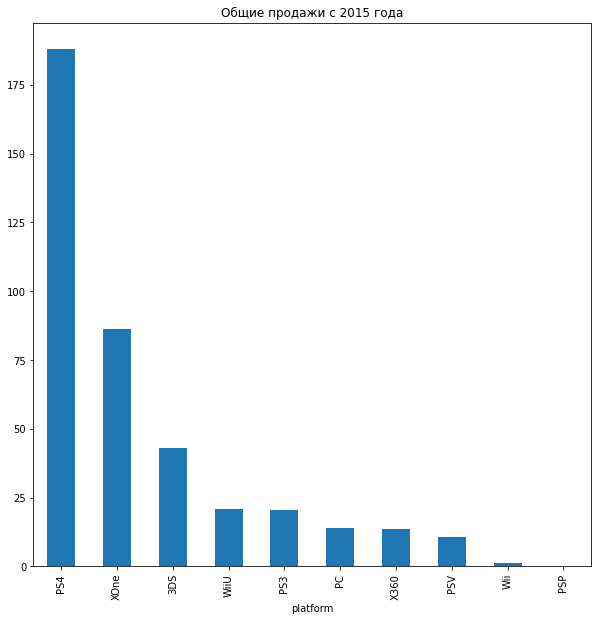

In [31]:
#посмотрим на продажи с 2015 года по каждой из платформ
year.groupby('platform')['all_sales'].sum().sort_values(ascending=False).plot(kind = 'bar',figsize = (10,10),title = "Общие продажи с 2015 года");

Видно что макисцмальные продажи собирает PS4 и XOne

* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

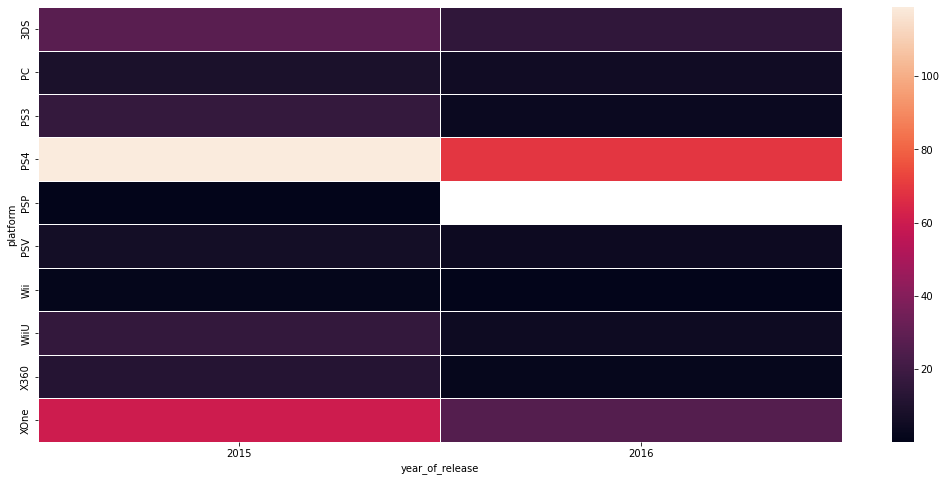

In [32]:
abc = year.pivot_table(index='platform',columns='year_of_release',values='all_sales',aggfunc=('sum'))
plt.figure(figsize=(18, 8))
sb.heatmap(abc,linewidths=.5);

Активно идут на спад Wii,WiiU,PSV,3DS,PS3,X360,но на замену двух последних идут PS4 и XOne.Потенциально прибыльными являются PS4 и XOne,так как это два гиганта индустрии.У PS4 дела идут получше чем у XOne, возмоно это связано с какими-то эксклюзивными договорами на реализацию какой-то определенной игры.То есть когда только на данной платформе есть определенная игра, а на лругой ее просто нет.

* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

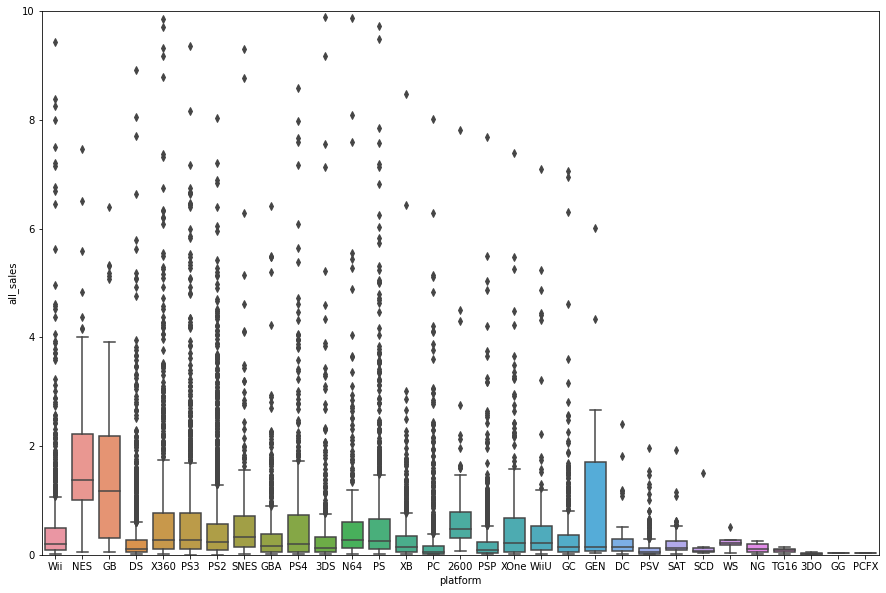

In [33]:
plt.figure(figsize=(15,10))
sb.boxplot(data=data,x='platform',y='all_sales')
plt.ylim(0,10);

Если смотреть на проджи по всем играм за весь промежуток времени, то видно что лидируют 3 платформы(NES,GB и GEN), но исходя из того, что мы узнали ранее, можно сделать вывод о том, что они резко и сильно стартовали с хорошими проджаами ,но потом их популярность падала и их существование прекратилось.

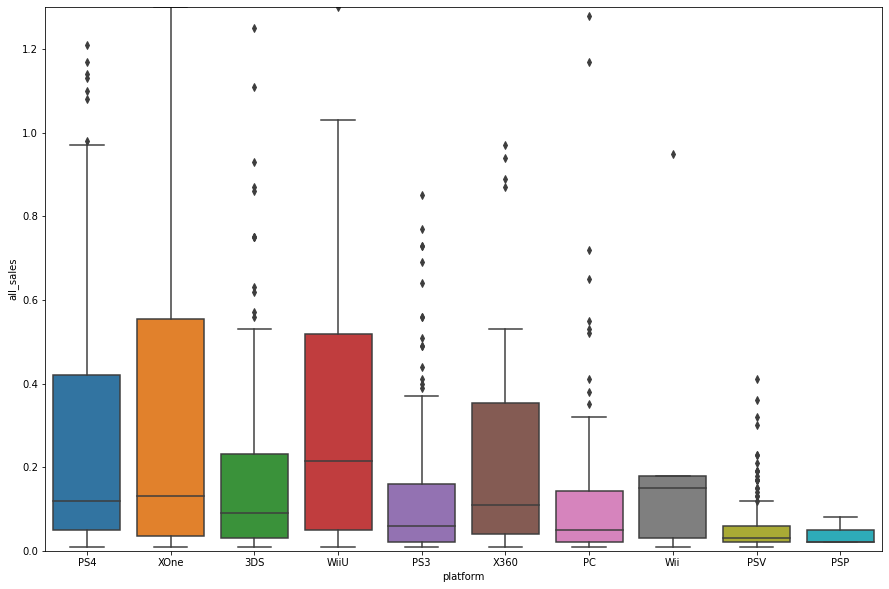

In [34]:
plt.figure(figsize=(15,10))
plt.ylim(0,1.3)
sb.boxplot(x='platform',y='all_sales',data=year);

По данной диаграмме видно, что медианное значение продаж бльше всего у WiiU и WII.PS4 и XOne рпимерно на равне.Хуже всего дела идут у PSP и PSV

* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [35]:
X_360 = data.query('platform == "X360"')
PS_3 = data.query('platform == "PS3"')
PS_4 = data.query('platform == "PS4"')
X_one = data.query('platform == "XOne"')
WiiU= data.query('platform == "WiiU"')

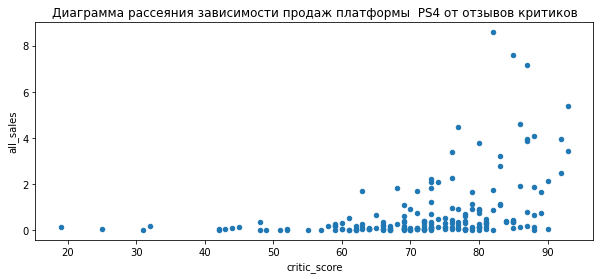

In [36]:
year.query('platform=="PS4"').sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='all_sales',figsize=(10,4),title='Диаграмма рассеяния зависимости продаж платформы  PS4 от отзывов критиков');

По диаграмме рассеяния видно, что чем больше оценка критиков, тем больше продаж,но зависимость не очень сильная.Посотрим что нам даст коэффицент коррелиции Пирсона.

In [37]:
print(PS_4['critic_score'].corr(PS_4['all_sales']))

Зависимость не сильная.

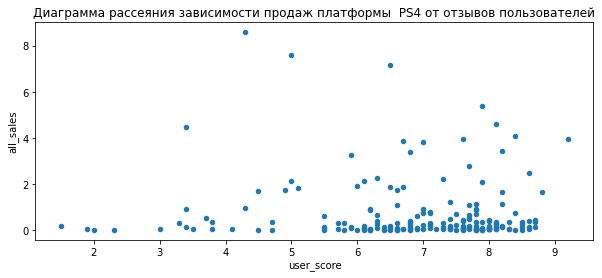

In [38]:
year.query('platform=="PS4"').sort_values(by='user_score',ascending=True).plot(kind='scatter',x='user_score',y='all_sales',figsize=(10,4),title='Диаграмма рассеяния зависимости продаж платформы  PS4 от отзывов пользователей');

In [39]:
print(PS_4['user_score'].corr(PS_4['all_sales']))

Так же видно, что зависимость не очень сильная, но она ниже чем у зависимости выше.

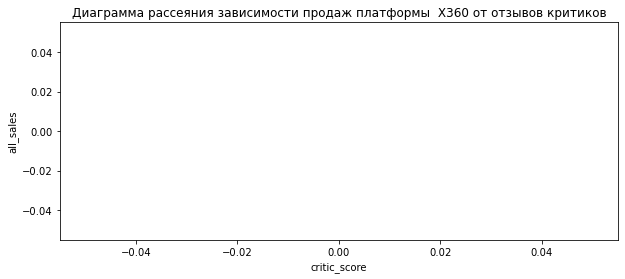

In [40]:
year.query('platform=="X360"').sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='all_sales',figsize=(10,4),title='Диаграмма рассеяния зависимости продаж платформы  X360 от отзывов критиков');

In [41]:
print(X_360['critic_score'].corr(X_360['all_sales']))

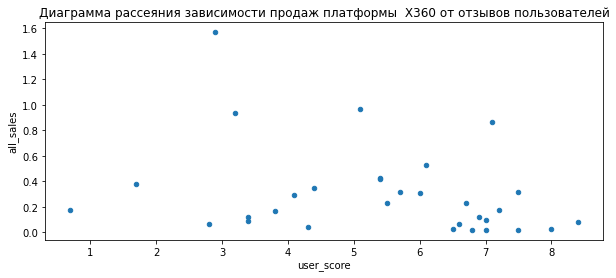

In [42]:
year.query('platform=="X360"').sort_values(by='user_score',ascending=True).plot(kind='scatter',x='user_score',y='all_sales',figsize=(10,4),title='Диаграмма рассеяния зависимости продаж платформы  X360 от отзывов пользователей');

In [43]:
print(X_360['user_score'].corr(X_360['all_sales']))

Диаграмма рассеяния показала пустой график,не совсем понимаю что это может означать...Возможно такие данные мы получили из-за отсутсвия или нужного кол-ва оценок.В целом зависимости очень слабые.

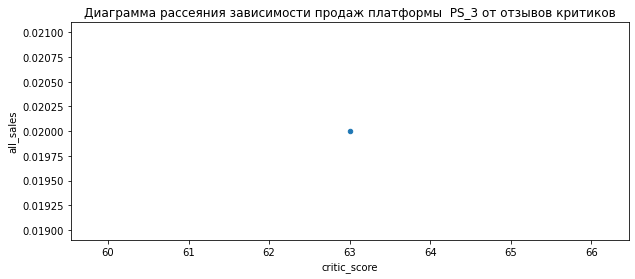

In [44]:
year.query('platform=="PS3"').sort_values(by='critic_score',ascending=True).plot(kind='scatter',
                                                                                 x='critic_score',
                                                                                 y='all_sales',
                                                                                 figsize=(10,4),
                                                                                 title='Диаграмма рассеяния зависимости продаж платформы  PS_3 от отзывов критиков');

In [45]:
print(PS_3['critic_score'].corr(PS_3['all_sales']))

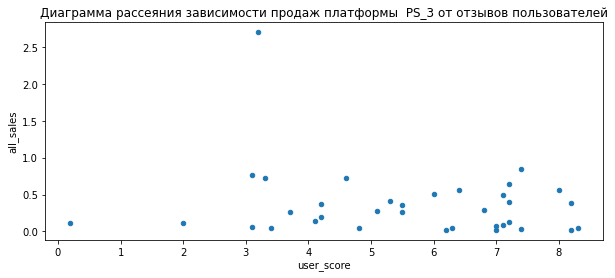

In [46]:
year.query('platform=="PS3"').sort_values(by='user_score',ascending=True).plot(kind='scatter',
                                                                               x='user_score',
                                                                               y='all_sales',
                                                                               figsize=(10,4),
                                                                               title='Диаграмма рассеяния зависимости продаж платформы  PS_3 от отзывов пользователей');

In [47]:
print(PS_3['user_score'].corr(PS_3['all_sales']))

Первая Диаграмма рассеяния показала практически пустой график,не совсем понимаю что это может означать...Возможно такие данные мы получили из-за отсутсвия нужного кол-ва оценок.В целом зависимости очень слабые.

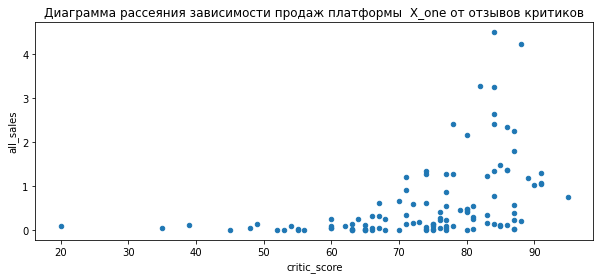

In [48]:
year.query('platform=="XOne"').sort_values(by='critic_score',ascending=True).plot(kind='scatter',
                                                                                  x='critic_score',
                                                                                  y='all_sales',
                                                                                  figsize=(10,4),
                                                                                  title='Диаграмма рассеяния зависимости продаж платформы  X_one от отзывов критиков');

In [49]:
print(X_one['critic_score'].corr(X_one['all_sales']))

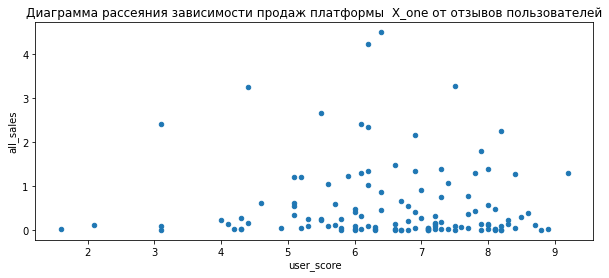

In [50]:
year.query('platform=="XOne"').sort_values(by='user_score',ascending=True).plot(kind='scatter',
                                                                               x='user_score',
                                                                               y='all_sales',
                                                                               figsize=(10,4),
                                                                               title='Диаграмма рассеяния зависимости продаж платформы  X_one от отзывов пользователей');

In [51]:
print(X_one['user_score'].corr(X_one['all_sales']))

Зависимость достаточно слоабая

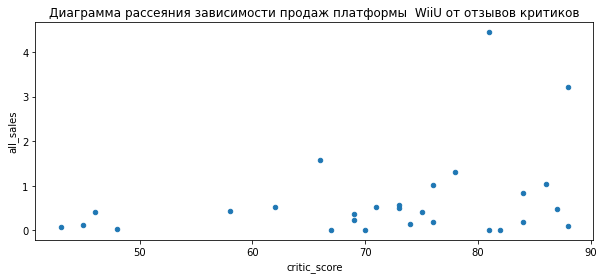

In [52]:
year.query('platform=="WiiU"').sort_values(by='critic_score',ascending=True).plot(kind='scatter',
                                                                                  x='critic_score',
                                                                                  y='all_sales',
                                                                                  figsize=(10,4),
                                                                                  title='Диаграмма рассеяния зависимости продаж платформы  WiiU от отзывов критиков');

In [53]:
print(WiiU['critic_score'].corr(WiiU['all_sales']))

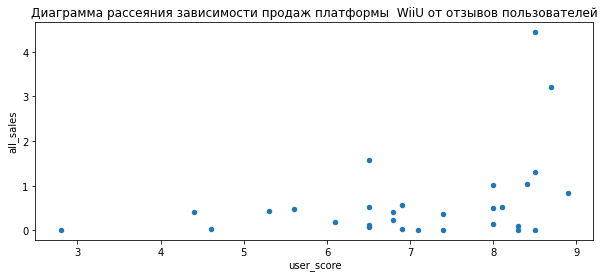

In [85]:
year.query('platform=="WiiU"').sort_values(by='user_score',ascending=True).plot(kind='scatter',
                                                                               x='user_score',
                                                                               y='all_sales',
                                                                               figsize=(10,4),
                                                                               title='Диаграмма рассеяния зависимости продаж платформы  WiiU от отзывов пользователей');

In [86]:
print(WiiU['user_score'].corr(WiiU['all_sales']))

Заивисимости есть, но слабые.

#### Вывод

Зависимости слабые, но среди них видна тенденция в том, что сильнее зависимость у отношения оценкв критиков - общие продажи.

* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [56]:
distribution = year.groupby('genre')['all_sales'].count().sort_values(ascending = False)

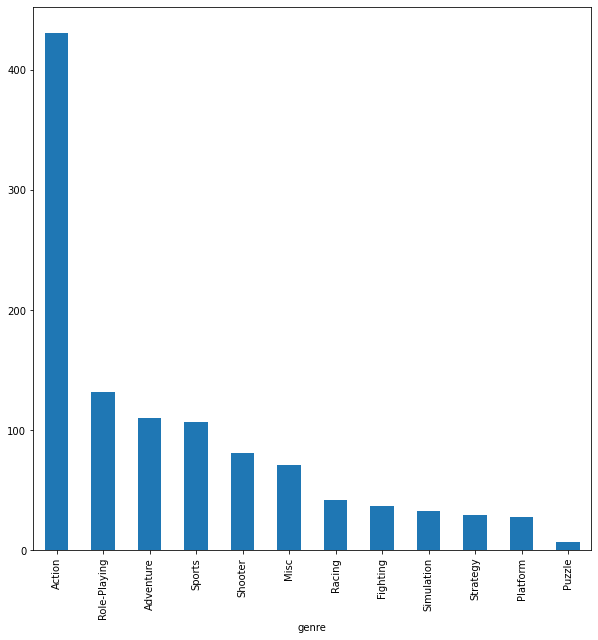

In [57]:
distribution.plot.bar(figsize = (10,10));

Самый большие продажи в жанре 'Action',следом идут жанры 'role-Playing' и 'Adventure', а меньше всего продаж в жанре 'Puzzle'

In [58]:
kek= year.groupby('genre')['all_sales'].median().sort_values(ascending = False)

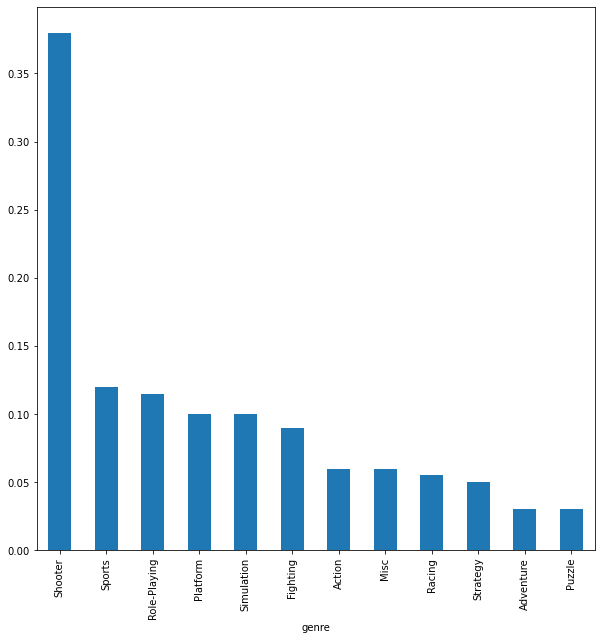

In [59]:
kek.plot.bar(figsize = (10,10));

По медианной прибыльности лидирует жанр 'Shooter'

## Шаг 4. Составьте портрет пользователя каждого региона

**Определите для пользователя каждого региона (NA, EU, JP):** 

* Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [60]:
na_user = year.pivot_table(index = 'platform',values=['na_sales','all_sales'],aggfunc = ('sum'))
na_user=na_user.sort_values(by='na_sales',ascending=False).head(5)
na_user

In [61]:
na_user['%_sales'] = na_user['na_sales'] / na_user['all_sales']

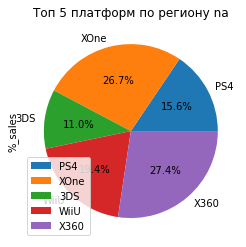

In [62]:
na_user.plot(kind = 'pie',y='%_sales',title = 'Топ 5 платформ по региону na',autopct='%1.1f%%');

По региону na лидирует "Xone"

In [63]:
eu_users = year.pivot_table(index = 'platform',values = ['all_sales','eu_sales'],aggfunc=('sum'))
eu_users = eu_users.sort_values(by = 'eu_sales',ascending = False).head(5)
eu_users['%_sales'] = eu_users['eu_sales']/eu_users['all_sales']

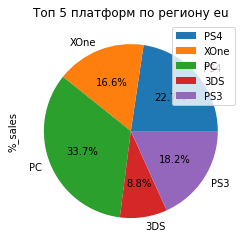

In [64]:
eu_users.plot(kind='pie',y='%_sales',autopct='%1.1f%%',title = 'Топ 5 платформ по региону eu');

По региону eu лидирует PC

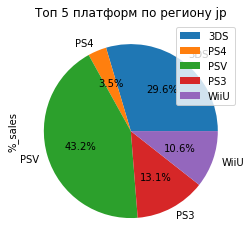

In [65]:
jp_users = year.pivot_table(index = 'platform',values = ['all_sales','jp_sales'],aggfunc = ('sum'))
jp_users = jp_users.sort_values(by = 'jp_sales',ascending = False).head(5)
jp_users['%_sales']=jp_users['jp_sales']/jp_users['all_sales']
jp_users.plot(kind='pie',y='%_sales',autopct='%1.1f%%',title='Топ 5 платформ по региону jp');

По региону jp лидирует PSV

In [66]:
other_users = year.pivot_table(index = 'platform',values = ['all_sales','other_sales'],aggfunc = ('sum'))
other_users = other_users.sort_values(by = 'other_sales',ascending = False).head(5)
other_users['%_sales'] = other_users['other_sales'] / other_users['all_sales']

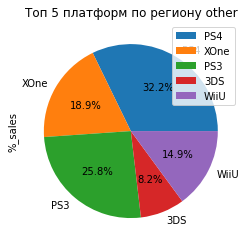

In [67]:
other_users.plot(kind = 'pie',y='%_sales',autopct='%1.1f%%',title='Топ 5 платформ по региону other');

По региону others лидирует Ps4

##### Вывод
* Различия в долях от региона к региону могут быть в силу того, что какие-то регионы могут быть более приоритетными для определенной  компаний или в странах не продатся данные консоли. 

In [68]:
year

**Самые популярные жанры (топ-5). Поясните разницу.**

In [69]:
na_sales_genre = year.pivot_table(index ='genre',values = ['na_sales'],aggfunc = 'sum')
na_sales_genre = na_sales_genre.sort_values(by = 'na_sales',ascending=False).head(5)

In [70]:
na_sales_genre

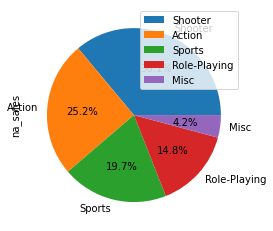

In [71]:
na_sales_genre.plot(kind='pie',y ='na_sales',autopct='%1.1f%%');

В регионе na самым популярным явялется жанр shooter

In [72]:
eu_sales_genre = year.pivot_table(index ='genre',values = ['eu_sales'],aggfunc = 'sum')
eu_sales_genre = eu_sales_genre.sort_values(by = 'eu_sales',ascending=False).head(5)
eu_sales_genre

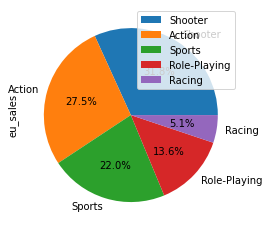

In [73]:
eu_sales_genre.plot(kind='pie',y ='eu_sales',autopct='%1.1f%%');

В регионе eu самым популярным явялется жанр shooter, так же как и в регионе na

In [74]:
jp_sales_genre = year.pivot_table(index ='genre',values = ['jp_sales'],aggfunc = 'sum')
jp_sales_genre = jp_sales_genre.sort_values(by = 'jp_sales',ascending=False).head(5)
jp_sales_genre 

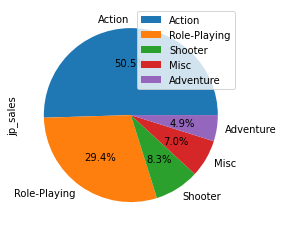

In [75]:
jp_sales_genre.plot(kind='pie',y ='jp_sales',autopct='%1.1f%%');

В регионе jp самым популярным явялется жанр Action

In [76]:
other_sales_genre = year.pivot_table(index ='genre',values = ['other_sales'],aggfunc = 'sum')
other_sales_genre = other_sales_genre.sort_values(by = 'other_sales',ascending=False).head(5)
other_sales_genre

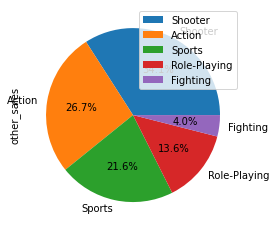

In [77]:
other_sales_genre.plot(kind='pie',y ='other_sales',autopct='%1.1f%%');

В регионе other самым популярным явялется жанр shooter

#### Вывод
* Различия по регионам могут быть возможны из-за разных культурных особенностей,популяризации какой-то определенной кансоли. 

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [78]:
year

In [79]:
na_ESRB_sales_rating = year.pivot_table(index ='rating',values = ['na_sales'],aggfunc = 'sum')
na_ESRB_sales_rating.sort_values(by='na_sales',ascending = False)

В регионе na преобладают продажи с рейтингом M

In [80]:
eu_ESRB_sales_rating = year.pivot_table(index ='rating',values = ['eu_sales'],aggfunc = 'sum')
eu_ESRB_sales_rating.sort_values(by='eu_sales',ascending = False)

В регионе eu преобладают продажи с рейтингом M

In [81]:
jp_ESRB_sales_rating = year.pivot_table(index ='rating',values = ['jp_sales'],aggfunc = 'sum')
jp_ESRB_sales_rating.sort_values(by='jp_sales',ascending = False)

В регионе jp преобладают продажи с рейтингом T(Рейтинг ND является рейтенгом заглушкой(не определен)

In [82]:
other_ESRB_sales_rating = year.pivot_table(index ='rating',values = ['other_sales'],aggfunc = 'sum')
other_ESRB_sales_rating.sort_values(by='other_sales',ascending = False)

В регионе other преобладают продажи с рейтингом M

Из данных полученных из сводных талиц видно, что самыым попуярным рейтингом по продажам является рейтинг M.

#### Портер пользователя каждого региона

Портерет пользователя регион na - пользователь обладает приставкой XOne,игры с жанром shooter и и рейтингом M.

Портерет пользователя регион eu - пользователь обладает приставкой PC,игры с жанром shooter и и рейтингом M.

Портерет пользователя регион jp - пользователь обладает приставкой PSW,игры с жанром Action и и рейтингом T.

Портерет пользователя региона other - пользователь обладает приставкой PS4,игры с жанром shooter и и рейтингом M.

## Шаг 5. Проверить гипотезы

* Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC разные;

In [83]:
array1=year.loc[year['platform'] == 'XOne','user_score'].dropna()
array2=year.loc[year['platform'] == 'PC','user_score'].dropna()

alpha = 0.05
results = st.ttest_ind(
    array1, 
    array2,
    equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотизу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

* Нулевая гипотеза - средние пользовательские рейтинги жанров Action и sports равны.
* Альтернативная гипотеза - средние пользовательские рейтинги жанров Action и sports не  равны.

In [84]:
array1=year.loc[year['genre'] == 'Action','user_score'].dropna()
array2=year.loc[year['genre'] == 'Sports','user_score'].dropna()

alpha = 0.05
results = st.ttest_ind(
    array1, 
    array2,
    equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотизу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

## Общий вывод

Мы выяснили, что скачок популярности игр случился в 1994 году,больше всего выпущено на платформе PS2.Одна платформа живет в среднем 10 лет, так же к 2016 году идет в целом спад рынка. Коэффицент корреляции Пирсона показал, что зависимость между оценкой критиков и продажей зависимость не сильная, но сильнее чем корреляция между оценкой пользователей и продажами(эту тенденцию мы заметили у всех топ платформ по продажам).Самым популярным жанром является action.
Так же составили портрет пользователя:
* Портерет пользователя регион na - пользователь обладает приставкой XOne,игры с жанром shooter и и рейтингом M.

* Портерет пользователя регион eu - пользователь обладает приставкой PC,игры с жанром shooter и и рейтингом M.

* Портерет пользователя регион jp - пользователь обладает приставкой PSW,игры с жанром Action и и рейтингом T.

* Портерет пользователя региона other - пользователь обладает приставкой PS4,игры с жанром shooter и и рейтингом M.


Так же отвергли две нулевых гипотезы  о том что средние пользовательские рейтинги жанров Action и Sports  разные и средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
